In [1]:
#Libreria para poder baixar o banco de dados original do drive
!pip install PyDrive &> /dev/null
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#Para baixar o banco de dados original
downloaded = drive.CreateFile({'id':"1A3Lz3ZPRlIEqEab3x3skWjFOJGyai1ZN"})
downloaded.GetContentFile('PredicaoAtributosVisuais.zip')

In [2]:
!unzip -q PredicaoAtributosVisuais.zip #Descompreção do arquivo de dados 

In [3]:
import pandas as pd
def returnAnnotations(file_attributos, file_annotations):
  df_attributes = pd.read_csv(file_attributos, header = None)
  list_attributes = list()
  list_attributes.append(df_attributes[0].values)
  handle = open(file_annotations)
  scores = dict()
  confidence = dict()
  for line in handle:
      words = line.split()
      i=0
      for word in words:
          if i == 0:
              scores[word]=list()
              confidence[word] = list()
              i+=1
          else:
              values = word.split(',')
              scores[words[0]].append(float(values[0]))
              confidence[words[0]].append(float(values[1]))
              i+=1
  scores = pd.DataFrame(scores).T
  scores.columns = list_attributes
  confidence = pd.DataFrame(confidence).T
  confidence.columns = list_attributes
  return scores,confidence


In [4]:
file_attributos = './Predição de Atributos Visuais/annotations/attributes.txt'
file_annotations = './Predição de Atributos Visuais/annotations/annotations.tsv'
file_training = './Predição de Atributos Visuais/holdout_split/training.txt'
file_test = './Predição de Atributos Visuais/holdout_split/test.txt'
def returnTrainingTest(file_attributos, file_annotations, file_training, file_test):
  scores,confidence = returnAnnotations(file_attributos, file_annotations)
  df_training = pd.read_csv(file_training, header = None)
  df_test = pd.read_csv(file_test, header = None)
  scores_training = scores[scores.index.isin(df_training[0].values)]
  scores_test = scores[scores.index.isin(df_test[0].values)]
  confidence_training = confidence[confidence.index.isin(df_training[0].values)]
  confidence_test = confidence[confidence.index.isin(df_test[0].values)]
  return scores_training, scores_test, confidence_training, confidence_test

In [5]:
scores_training, scores_test, confidence_training, confidence_test = returnTrainingTest(file_attributos, file_annotations, file_training, file_test)

In [6]:
scores_training

dirty daylight     night sunrisesunset  dawndusk  \
00000064/1.jpg    0.213370  0.83585  0.138240      0.164860  0.624940   
00000064/101.jpg  0.087876  0.86553  0.038267      0.046497  0.062170   
00000064/106.jpg  0.231350  0.73344  0.038267      0.164860  0.118550   
00000064/107.jpg  0.406980  0.56384  0.862520      0.164860  0.800930   
00000064/109.jpg  0.257200  0.25579  0.686770      0.046497  0.551150   
...                    ...      ...       ...           ...       ...   
90000014/91.jpg   0.081369  1.00000  0.032815      0.005487  0.022595   
90000014/92.jpg   0.019562  0.94944  0.032815      0.005487  0.191390   
90000014/93.jpg   0.019562  0.94944  0.032815      0.092225  0.064793   
90000014/95.jpg   0.019562  0.94944  0.032815      0.005487  0.444570   
90000014/97.jpg   0.019562  0.94582  0.032815      0.005487  0.167350   

                     sunny    clouds       fog     storm      snow  ...  \
00000064/1.jpg    0.386150  0.339510  0.019698  0.023172  0.023848  ...   
00000064/101.jpg  1.000000  0.188200  0.019698  0.023172  0.023848  ...   
00000064/106.jpg  0.386150  0.564970  0.019698  0.493610  0.023848  ...   
00000064/107.jpg  0.043308  0.188200  0.156150  0.023172  0.046109  ...   
00000064/109.jpg  0.043308  0.188200  0.019698  0.023172  0.023848  ...   
...                    ...       ...       ...       ...       ...  ...   
90000014/91.jpg   1.000000  0.146520  0.051587  0.000000  0.022788  ...   
90000014/92.jpg   0.449780  0.293900  0.051587  0.136960  0.022788  ...   
90000014/93.jpg   0.559590  0.293900  0.051587  0.064861  0.071293  ...   
90000014/95.jpg   0.449780  0.091672  0.051587  0.041245  0.022788  ...   
90000014/97.jpg   0.378510  0.403590  0.051587  0.233920  0.022788  ...   

                       ice cluttered soothing stressful  exciting sentimental  \
00000064/1.jpg    0.022540   0.49180  0.23348  0.129520  0.057863    0.119120   
00000064/101.jpg  0.022540   0.49180  0.66869  0.078056  0.392200    0.124100   
00000064/106.jpg  0.022540   0.49180  0.32528  0.013640  0.057863    0.025097   
00000064/107.jpg  0.022540   0.49180  0.14167  0.378730  0.057863    0.069622   
00000064/109.jpg  0.022540   0.56672  0.51443  0.013640  0.165460    0.124100   
...                    ...       ...      ...       ...       ...         ...   
90000014/91.jpg   0.044502   0.18885  0.29076  0.032437  0.047200    0.037370   
90000014/92.jpg   0.044502   0.18885  0.40882  0.032437  0.168960    0.037370   
90000014/93.jpg   0.044502   0.18885  0.40882  0.094569  0.168960    0.032379   
90000014/95.jpg   0.044502   0.18885  0.40882  0.032437  0.168960    0.037370   
90000014/97.jpg   0.044502   0.18885  0.49481  0.094569  0.294790    0.152110   

                 mysterious    boring    gloomy      lush  
00000064/1.jpg     0.095998  0.630750  0.410520  0.175360  
00000064/101.jpg   0.141060  0.018542  0.142430  0.388870  
00000064/106.jpg   0.095998  0.687330  0.419110  0.047206  
00000064/107.jpg   0.177450  0.780870  0.533500  0.047206  
00000064/109.jpg   0.267560  0.018542  0.499370  0.047206  
...                     ...       ...       ...       ...  
90000014/91.jpg    0.247540  0.000000  0.073662  0.036722  
90000014/92.jpg    0.247540  0.000000  0.073662  0.277750  
90000014/93.jpg    0.172280  0.028431  0.073662  0.277750  
90000014/95.jpg    0.172280  0.000000  0.073662  0.337680  
90000014/97.jpg    0.322800  0.000000  0.124180  0.428230  

[6904 rows x 40 columns]

In [7]:
scores_test

dirty daylight     night sunrisesunset  dawndusk  \
00000090/1.jpg    0.78485  0.13722  0.154100      0.040839  0.212650   
00000090/10.jpg   0.78485  0.24387  0.154100      0.357350  0.244340   
00000090/104.jpg  0.42252  0.94661  0.203790      0.040839  0.055406   
00000090/105.jpg  0.08370  0.94661  0.154100      0.088234  0.055406   
00000090/107.jpg  0.43993  0.60259  0.253480      0.350100  0.502940   
...                   ...      ...       ...           ...       ...   
90000013/83.jpg   0.11458  0.12450  0.602250      0.853060  0.665520   
90000013/86.jpg   0.11458  0.85071  0.092844      0.274790  0.217740   
90000013/89.jpg   0.24364  0.94378  0.067642      0.063162  0.311270   
90000013/9.jpg    0.22422  0.12450  0.696000      0.641430  0.682600   
90000013/92.jpg   0.54405  0.74359  0.029066      0.063162  0.158380   

                     sunny    clouds       fog     storm      snow  ...  \
00000090/1.jpg    0.016391  1.000000  0.860690  0.763550  0.660870  ...   
00000090/10.jpg   0.016391  0.962260  0.690630  0.143310  0.023285  ...   
00000090/104.jpg  0.375890  0.560730  0.031248  0.143310  0.023285  ...   
00000090/105.jpg  0.791360  0.012467  0.031248  0.143310  0.023285  ...   
00000090/107.jpg  0.016391  0.290090  0.415420  0.326540  0.023285  ...   
...                    ...       ...       ...       ...       ...  ...   
90000013/83.jpg   0.026988  0.030991  0.116580  0.174340  0.000000  ...   
90000013/86.jpg   0.661940  0.155460  0.044431  0.127690  0.025132  ...   
90000013/89.jpg   0.779310  0.030991  0.193780  0.090742  0.157640  ...   
90000013/9.jpg    0.026988  0.137420  0.116580  0.174340  0.058260  ...   
90000013/92.jpg   0.082788  0.829930  0.685360  0.178580  0.058260  ...   

                       ice cluttered  soothing stressful  exciting  \
00000090/1.jpg    0.146090   0.71623  0.184200  0.941410  0.013662   
00000090/10.jpg   0.146090   0.51145  0.081465  0.739920  0.013662   
00000090/104.jpg  0.000000   0.92920  0.205130  0.058799  0.219860   
00000090/105.jpg  0.000000   0.92920  0.484650  0.058799  0.225320   
00000090/107.jpg  0.140700   0.67882  0.081465  0.622540  0.013662   
...                    ...       ...       ...       ...       ...   
90000013/83.jpg   0.164850   0.77773  0.068099  0.508590  0.450080   
90000013/86.jpg   0.033395   0.78439  0.203710  0.433350  0.675170   
90000013/89.jpg   0.033395   0.78439  0.181070  0.508590  0.723740   
90000013/9.jpg    0.033395   0.67587  0.294050  0.666620  0.450080   
90000013/92.jpg   0.506420   0.78439  0.625590  0.433350  0.446240   

                 sentimental mysterious    boring   gloomy      lush  
00000090/1.jpg      0.053484   0.081992  0.409010  0.79530  0.107840  
00000090/10.jpg     0.053484   0.040081  0.409010  0.73766  0.198510  
00000090/104.jpg    0.053484   0.081992  0.054612  0.35821  0.057435  
00000090/105.jpg    0.053484   0.040081  0.054612  0.15082  0.148100  
00000090/107.jpg    0.053484   0.040081  0.175380  0.61165  0.107840  
...                      ...        ...       ...      ...       ...  
90000013/83.jpg     0.379310   0.699290  0.666160  0.71806  0.275820  
90000013/86.jpg     0.112220   0.596450  0.309020  0.01687  0.275820  
90000013/89.jpg     0.024025   0.512830  0.522520  0.24085  0.275820  
90000013/9.jpg      0.435830   0.914420  0.626840  0.53489  0.275820  
90000013/92.jpg     0.406870   0.037341  0.286620  0.14326  0.889770  

[1667 rows x 40 columns]

In [8]:
confidence_training

dirty daylight night sunrisesunset dawndusk sunny clouds  \
00000064/1.jpg     7.0      6.0   6.0           5.0      6.0   5.0    5.0   
00000064/101.jpg   7.0      6.0   6.0           5.0      6.0   5.0    5.0   
00000064/106.jpg   7.0      6.0   6.0           5.0      6.0   5.0    5.0   
00000064/107.jpg   7.0      6.0   6.0           5.0      6.0   5.0    5.0   
00000064/109.jpg   7.0      6.0   6.0           5.0      6.0   5.0    5.0   
...                ...      ...   ...           ...      ...   ...    ...   
90000014/91.jpg    5.0      6.0   6.0           6.0      6.0   6.0    7.0   
90000014/92.jpg    5.0      6.0   6.0           6.0      6.0   6.0    7.0   
90000014/93.jpg    5.0      6.0   6.0           6.0      6.0   6.0    7.0   
90000014/95.jpg    5.0      6.0   6.0           6.0      6.0   6.0    7.0   
90000014/97.jpg    5.0      6.0   6.0           6.0      6.0   6.0    7.0   

                  fog storm snow  ...  ice cluttered soothing stressful  \
00000064/1.jpg    6.0   6.0  6.0  ...  5.0       7.0      7.0       5.0   
00000064/101.jpg  6.0   6.0  6.0  ...  5.0       7.0      7.0       5.0   
00000064/106.jpg  6.0   6.0  6.0  ...  5.0       7.0      7.0       5.0   
00000064/107.jpg  6.0   6.0  5.0  ...  5.0       7.0      7.0       5.0   
00000064/109.jpg  6.0   6.0  6.0  ...  5.0       7.0      7.0       5.0   
...               ...   ...  ...  ...  ...       ...      ...       ...   
90000014/91.jpg   5.0   5.0  6.0  ...  7.0       5.0      6.0       6.0   
90000014/92.jpg   5.0   5.0  6.0  ...  7.0       5.0      6.0       6.0   
90000014/93.jpg   5.0   5.0  6.0  ...  7.0       5.0      6.0       6.0   
90000014/95.jpg   5.0   5.0  6.0  ...  7.0       5.0      6.0       6.0   
90000014/97.jpg   5.0   5.0  6.0  ...  7.0       5.0      6.0       6.0   

                 exciting sentimental mysterious boring gloomy lush  
00000064/1.jpg        6.0         6.0        7.0    6.0    8.0  6.0  
00000064/101.jpg      6.0         6.0        7.0    6.0    8.0  6.0  
00000064/106.jpg      6.0         6.0        7.0    6.0    8.0  6.0  
00000064/107.jpg      6.0         6.0        7.0    6.0    8.0  6.0  
00000064/109.jpg      6.0         6.0        7.0    6.0    8.0  6.0  
...                   ...         ...        ...    ...    ...  ...  
90000014/91.jpg       5.0         5.0        5.0    6.0    6.0  6.0  
90000014/92.jpg       5.0         5.0        5.0    6.0    6.0  6.0  
90000014/93.jpg       5.0         4.0        5.0    6.0    6.0  6.0  
90000014/95.jpg       5.0         5.0        5.0    6.0    6.0  6.0  
90000014/97.jpg       5.0         5.0        5.0    6.0    6.0  6.0  

[6904 rows x 40 columns]

In [9]:
confidence_test

dirty daylight night sunrisesunset dawndusk sunny clouds  \
00000090/1.jpg     6.0      6.0   7.0           6.0      7.0   6.0    6.0   
00000090/10.jpg    6.0      6.0   7.0           6.0      7.0   6.0    6.0   
00000090/104.jpg   6.0      6.0   7.0           6.0      7.0   6.0    6.0   
00000090/105.jpg   6.0      6.0   7.0           6.0      7.0   6.0    6.0   
00000090/107.jpg   6.0      6.0   7.0           6.0      7.0   6.0    6.0   
...                ...      ...   ...           ...      ...   ...    ...   
90000013/83.jpg    5.0      7.0   7.0           6.0      5.0   6.0    5.0   
90000013/86.jpg    5.0      7.0   7.0           6.0      5.0   6.0    5.0   
90000013/89.jpg    5.0      7.0   7.0           6.0      5.0   6.0    5.0   
90000013/9.jpg     5.0      7.0   7.0           6.0      5.0   6.0    5.0   
90000013/92.jpg    5.0      7.0   7.0           6.0      5.0   6.0    5.0   

                  fog storm snow  ...  ice cluttered soothing stressful  \
00000090/1.jpg    6.0   5.0  5.0  ...  5.0       5.0      6.0       6.0   
00000090/10.jpg   5.0   5.0  5.0  ...  5.0       5.0      6.0       6.0   
00000090/104.jpg  6.0   5.0  5.0  ...  5.0       5.0      6.0       6.0   
00000090/105.jpg  6.0   5.0  5.0  ...  5.0       5.0      6.0       6.0   
00000090/107.jpg  6.0   5.0  5.0  ...  5.0       5.0      6.0       6.0   
...               ...   ...  ...  ...  ...       ...      ...       ...   
90000013/83.jpg   7.0   8.0  6.0  ...  6.0       7.0      6.0       7.0   
90000013/86.jpg   7.0   8.0  6.0  ...  6.0       7.0      6.0       7.0   
90000013/89.jpg   7.0   8.0  6.0  ...  6.0       7.0      6.0       7.0   
90000013/9.jpg    7.0   8.0  6.0  ...  6.0       7.0      6.0       7.0   
90000013/92.jpg   7.0   8.0  6.0  ...  6.0       7.0      6.0       7.0   

                 exciting sentimental mysterious boring gloomy lush  
00000090/1.jpg        6.0         6.0        6.0    5.0    5.0  5.0  
00000090/10.jpg       6.0         6.0        6.0    5.0    5.0  5.0  
00000090/104.jpg      6.0         6.0        6.0    5.0    5.0  5.0  
00000090/105.jpg      6.0         6.0        6.0    5.0    5.0  5.0  
00000090/107.jpg      6.0         6.0        6.0    5.0    5.0  5.0  
...                   ...         ...        ...    ...    ...  ...  
90000013/83.jpg       6.0         5.0        5.0    9.0    6.0  6.0  
90000013/86.jpg       6.0         5.0        5.0    9.0    6.0  6.0  
90000013/89.jpg       6.0         5.0        5.0    9.0    6.0  6.0  
90000013/9.jpg        6.0         5.0        5.0    9.0    6.0  6.0  
90000013/92.jpg       6.0         5.0        5.0    9.0    6.0  6.0  

[1667 rows x 40 columns]

In [10]:
confidence_training = confidence_training.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_training

dirty daylight night sunrisesunset dawndusk sunny clouds fog  \
00000064/1.jpg       1        1     1             0        1     0      0   1   
00000064/101.jpg     1        1     1             0        1     0      0   1   
00000064/106.jpg     1        1     1             0        1     0      0   1   
00000064/107.jpg     1        1     1             0        1     0      0   1   
00000064/109.jpg     1        1     1             0        1     0      0   1   
...                ...      ...   ...           ...      ...   ...    ...  ..   
90000014/91.jpg      0        1     1             1        1     1      1   0   
90000014/92.jpg      0        1     1             1        1     1      1   0   
90000014/93.jpg      0        1     1             1        1     1      1   0   
90000014/95.jpg      0        1     1             1        1     1      1   0   
90000014/97.jpg      0        1     1             1        1     1      1   0   

                 storm snow  ... ice cluttered soothing stressful exciting  \
00000064/1.jpg       1    1  ...   0         1        1         0        1   
00000064/101.jpg     1    1  ...   0         1        1         0        1   
00000064/106.jpg     1    1  ...   0         1        1         0        1   
00000064/107.jpg     1    0  ...   0         1        1         0        1   
00000064/109.jpg     1    1  ...   0         1        1         0        1   
...                ...  ...  ...  ..       ...      ...       ...      ...   
90000014/91.jpg      0    1  ...   1         0        1         1        0   
90000014/92.jpg      0    1  ...   1         0        1         1        0   
90000014/93.jpg      0    1  ...   1         0        1         1        0   
90000014/95.jpg      0    1  ...   1         0        1         1        0   
90000014/97.jpg      0    1  ...   1         0        1         1        0   

                 sentimental mysterious boring gloomy lush  
00000064/1.jpg             1          1      1      1    1  
00000064/101.jpg           1          1      1      1    1  
00000064/106.jpg           1          1      1      1    1  
00000064/107.jpg           1          1      1      1    1  
00000064/109.jpg           1          1      1      1    1  
...                      ...        ...    ...    ...  ...  
90000014/91.jpg            0          0      1      1    1  
90000014/92.jpg            0          0      1      1    1  
90000014/93.jpg            0          0      1      1    1  
90000014/95.jpg            0          0      1      1    1  
90000014/97.jpg            0          0      1      1    1  

[6904 rows x 40 columns]

In [11]:
confidence_test = confidence_test.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_test

dirty daylight night sunrisesunset dawndusk sunny clouds fog  \
00000090/1.jpg       1        1     1             1        1     1      1   1   
00000090/10.jpg      1        1     1             1        1     1      1   0   
00000090/104.jpg     1        1     1             1        1     1      1   1   
00000090/105.jpg     1        1     1             1        1     1      1   1   
00000090/107.jpg     1        1     1             1        1     1      1   1   
...                ...      ...   ...           ...      ...   ...    ...  ..   
90000013/83.jpg      0        1     1             1        0     1      0   1   
90000013/86.jpg      0        1     1             1        0     1      0   1   
90000013/89.jpg      0        1     1             1        0     1      0   1   
90000013/9.jpg       0        1     1             1        0     1      0   1   
90000013/92.jpg      0        1     1             1        0     1      0   1   

                 storm snow  ... ice cluttered soothing stressful exciting  \
00000090/1.jpg       0    0  ...   0         0        1         1        1   
00000090/10.jpg      0    0  ...   0         0        1         1        1   
00000090/104.jpg     0    0  ...   0         0        1         1        1   
00000090/105.jpg     0    0  ...   0         0        1         1        1   
00000090/107.jpg     0    0  ...   0         0        1         1        1   
...                ...  ...  ...  ..       ...      ...       ...      ...   
90000013/83.jpg      1    1  ...   1         1        1         1        1   
90000013/86.jpg      1    1  ...   1         1        1         1        1   
90000013/89.jpg      1    1  ...   1         1        1         1        1   
90000013/9.jpg       1    1  ...   1         1        1         1        1   
90000013/92.jpg      1    1  ...   1         1        1         1        1   

                 sentimental mysterious boring gloomy lush  
00000090/1.jpg             1          1      0      0    0  
00000090/10.jpg            1          1      0      0    0  
00000090/104.jpg           1          1      0      0    0  
00000090/105.jpg           1          1      0      0    0  
00000090/107.jpg           1          1      0      0    0  
...                      ...        ...    ...    ...  ...  
90000013/83.jpg            0          0      1      1    1  
90000013/86.jpg            0          0      1      1    1  
90000013/89.jpg            0          0      1      1    1  
90000013/9.jpg             0          0      1      1    1  
90000013/92.jpg            0          0      1      1    1  

[1667 rows x 40 columns]

In [12]:
#df_training = pd.DataFrame(scores_training*confidence_training, columns=scores_training.columns, index=scores_training.index)
df_training = scores_training
df_training

dirty daylight     night sunrisesunset  dawndusk  \
00000064/1.jpg    0.213370  0.83585  0.138240      0.164860  0.624940   
00000064/101.jpg  0.087876  0.86553  0.038267      0.046497  0.062170   
00000064/106.jpg  0.231350  0.73344  0.038267      0.164860  0.118550   
00000064/107.jpg  0.406980  0.56384  0.862520      0.164860  0.800930   
00000064/109.jpg  0.257200  0.25579  0.686770      0.046497  0.551150   
...                    ...      ...       ...           ...       ...   
90000014/91.jpg   0.081369  1.00000  0.032815      0.005487  0.022595   
90000014/92.jpg   0.019562  0.94944  0.032815      0.005487  0.191390   
90000014/93.jpg   0.019562  0.94944  0.032815      0.092225  0.064793   
90000014/95.jpg   0.019562  0.94944  0.032815      0.005487  0.444570   
90000014/97.jpg   0.019562  0.94582  0.032815      0.005487  0.167350   

                     sunny    clouds       fog     storm      snow  ...  \
00000064/1.jpg    0.386150  0.339510  0.019698  0.023172  0.023848  ...   
00000064/101.jpg  1.000000  0.188200  0.019698  0.023172  0.023848  ...   
00000064/106.jpg  0.386150  0.564970  0.019698  0.493610  0.023848  ...   
00000064/107.jpg  0.043308  0.188200  0.156150  0.023172  0.046109  ...   
00000064/109.jpg  0.043308  0.188200  0.019698  0.023172  0.023848  ...   
...                    ...       ...       ...       ...       ...  ...   
90000014/91.jpg   1.000000  0.146520  0.051587  0.000000  0.022788  ...   
90000014/92.jpg   0.449780  0.293900  0.051587  0.136960  0.022788  ...   
90000014/93.jpg   0.559590  0.293900  0.051587  0.064861  0.071293  ...   
90000014/95.jpg   0.449780  0.091672  0.051587  0.041245  0.022788  ...   
90000014/97.jpg   0.378510  0.403590  0.051587  0.233920  0.022788  ...   

                       ice cluttered soothing stressful  exciting sentimental  \
00000064/1.jpg    0.022540   0.49180  0.23348  0.129520  0.057863    0.119120   
00000064/101.jpg  0.022540   0.49180  0.66869  0.078056  0.392200    0.124100   
00000064/106.jpg  0.022540   0.49180  0.32528  0.013640  0.057863    0.025097   
00000064/107.jpg  0.022540   0.49180  0.14167  0.378730  0.057863    0.069622   
00000064/109.jpg  0.022540   0.56672  0.51443  0.013640  0.165460    0.124100   
...                    ...       ...      ...       ...       ...         ...   
90000014/91.jpg   0.044502   0.18885  0.29076  0.032437  0.047200    0.037370   
90000014/92.jpg   0.044502   0.18885  0.40882  0.032437  0.168960    0.037370   
90000014/93.jpg   0.044502   0.18885  0.40882  0.094569  0.168960    0.032379   
90000014/95.jpg   0.044502   0.18885  0.40882  0.032437  0.168960    0.037370   
90000014/97.jpg   0.044502   0.18885  0.49481  0.094569  0.294790    0.152110   

                 mysterious    boring    gloomy      lush  
00000064/1.jpg     0.095998  0.630750  0.410520  0.175360  
00000064/101.jpg   0.141060  0.018542  0.142430  0.388870  
00000064/106.jpg   0.095998  0.687330  0.419110  0.047206  
00000064/107.jpg   0.177450  0.780870  0.533500  0.047206  
00000064/109.jpg   0.267560  0.018542  0.499370  0.047206  
...                     ...       ...       ...       ...  
90000014/91.jpg    0.247540  0.000000  0.073662  0.036722  
90000014/92.jpg    0.247540  0.000000  0.073662  0.277750  
90000014/93.jpg    0.172280  0.028431  0.073662  0.277750  
90000014/95.jpg    0.172280  0.000000  0.073662  0.337680  
90000014/97.jpg    0.322800  0.000000  0.124180  0.428230  

[6904 rows x 40 columns]

In [13]:
#df_test = pd.DataFrame(scores_test*confidence_test, columns=scores_test.columns, index=scores_test.index)
df_test = scores_test
df_test

dirty daylight     night sunrisesunset  dawndusk  \
00000090/1.jpg    0.78485  0.13722  0.154100      0.040839  0.212650   
00000090/10.jpg   0.78485  0.24387  0.154100      0.357350  0.244340   
00000090/104.jpg  0.42252  0.94661  0.203790      0.040839  0.055406   
00000090/105.jpg  0.08370  0.94661  0.154100      0.088234  0.055406   
00000090/107.jpg  0.43993  0.60259  0.253480      0.350100  0.502940   
...                   ...      ...       ...           ...       ...   
90000013/83.jpg   0.11458  0.12450  0.602250      0.853060  0.665520   
90000013/86.jpg   0.11458  0.85071  0.092844      0.274790  0.217740   
90000013/89.jpg   0.24364  0.94378  0.067642      0.063162  0.311270   
90000013/9.jpg    0.22422  0.12450  0.696000      0.641430  0.682600   
90000013/92.jpg   0.54405  0.74359  0.029066      0.063162  0.158380   

                     sunny    clouds       fog     storm      snow  ...  \
00000090/1.jpg    0.016391  1.000000  0.860690  0.763550  0.660870  ...   
00000090/10.jpg   0.016391  0.962260  0.690630  0.143310  0.023285  ...   
00000090/104.jpg  0.375890  0.560730  0.031248  0.143310  0.023285  ...   
00000090/105.jpg  0.791360  0.012467  0.031248  0.143310  0.023285  ...   
00000090/107.jpg  0.016391  0.290090  0.415420  0.326540  0.023285  ...   
...                    ...       ...       ...       ...       ...  ...   
90000013/83.jpg   0.026988  0.030991  0.116580  0.174340  0.000000  ...   
90000013/86.jpg   0.661940  0.155460  0.044431  0.127690  0.025132  ...   
90000013/89.jpg   0.779310  0.030991  0.193780  0.090742  0.157640  ...   
90000013/9.jpg    0.026988  0.137420  0.116580  0.174340  0.058260  ...   
90000013/92.jpg   0.082788  0.829930  0.685360  0.178580  0.058260  ...   

                       ice cluttered  soothing stressful  exciting  \
00000090/1.jpg    0.146090   0.71623  0.184200  0.941410  0.013662   
00000090/10.jpg   0.146090   0.51145  0.081465  0.739920  0.013662   
00000090/104.jpg  0.000000   0.92920  0.205130  0.058799  0.219860   
00000090/105.jpg  0.000000   0.92920  0.484650  0.058799  0.225320   
00000090/107.jpg  0.140700   0.67882  0.081465  0.622540  0.013662   
...                    ...       ...       ...       ...       ...   
90000013/83.jpg   0.164850   0.77773  0.068099  0.508590  0.450080   
90000013/86.jpg   0.033395   0.78439  0.203710  0.433350  0.675170   
90000013/89.jpg   0.033395   0.78439  0.181070  0.508590  0.723740   
90000013/9.jpg    0.033395   0.67587  0.294050  0.666620  0.450080   
90000013/92.jpg   0.506420   0.78439  0.625590  0.433350  0.446240   

                 sentimental mysterious    boring   gloomy      lush  
00000090/1.jpg      0.053484   0.081992  0.409010  0.79530  0.107840  
00000090/10.jpg     0.053484   0.040081  0.409010  0.73766  0.198510  
00000090/104.jpg    0.053484   0.081992  0.054612  0.35821  0.057435  
00000090/105.jpg    0.053484   0.040081  0.054612  0.15082  0.148100  
00000090/107.jpg    0.053484   0.040081  0.175380  0.61165  0.107840  
...                      ...        ...       ...      ...       ...  
90000013/83.jpg     0.379310   0.699290  0.666160  0.71806  0.275820  
90000013/86.jpg     0.112220   0.596450  0.309020  0.01687  0.275820  
90000013/89.jpg     0.024025   0.512830  0.522520  0.24085  0.275820  
90000013/9.jpg      0.435830   0.914420  0.626840  0.53489  0.275820  
90000013/92.jpg     0.406870   0.037341  0.286620  0.14326  0.889770  

[1667 rows x 40 columns]

# Verificação visual do balanço do banco de dados no conjunto de treino.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


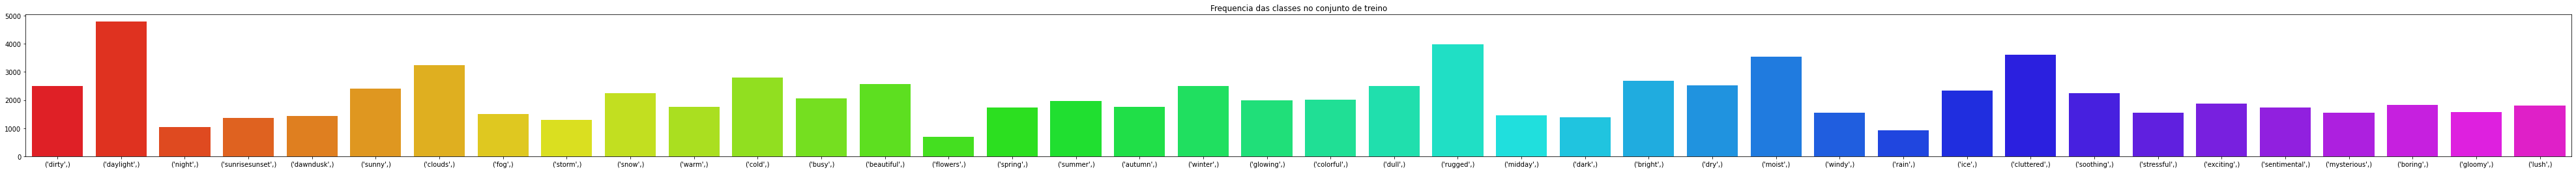

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_markdown
display_markdown('# Verificação visual do balanço do banco de dados no conjunto de treino.',raw=True)
plt.figure(figsize=(70, 4))
plt.title('Frequencia das classes no conjunto de treino')
palette = sns.color_palette('gist_rainbow', len(df_training.columns.values))
sns.barplot(df_training.columns.values, df_training.sum().values,palette=palette)

In [15]:
import os
path_drive = os.getcwd()
def returnPathImages(path):
  imageLD = dict()
  imageAlignedLD = dict()
  pastas = ['imageLD', 'imageAlignedLD']
  path_imagens=list()
  for pasta in pastas:
    dataset = os.listdir(path+'/Predição de Atributos Visuais/'+pasta+'/')
    for data in dataset:
      if data != '.DS_Store' and pasta=='imageLD':
        imagenes = os.listdir(path+'/Predição de Atributos Visuais/'+pasta+'/'+data+'/')
        for imagen in imagenes:
          path_imagen = path+'/Predição de Atributos Visuais/'+pasta+'/'+data+'/'+imagen
          imageLD[data+'/'+imagen]=path_imagen
      if data != '.DS_Store' and pasta=='imageAlignedLD':
        imagenes = os.listdir(path+'/Predição de Atributos Visuais/'+pasta+'/'+data+'/')
        for imagen in imagenes:
          path_imagen = path+'/Predição de Atributos Visuais/'+pasta+'/'+data+'/'+imagen
          imageAlignedLD[data+'/'+imagen]=path_imagen
  imageLD = pd.DataFrame(data=imageLD.values(), index=imageLD.keys(), columns=['Path'])
  imageAlignedLD = pd.DataFrame(data=imageAlignedLD.values(), index=imageAlignedLD.keys(), columns=['Path'])
  return imageLD, imageAlignedLD

In [16]:
imageLD, imageAlignedLD = returnPathImages(path_drive)

In [17]:
imageLD

Path
00017609/20130327_003444.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20120707_230439.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20130402_180443.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20121021_200445.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20120423_203438.jpg  /content/Predição de Atributos Visuais/imageLD...
...                                                                         ...
00000398/42.jpg               /content/Predição de Atributos Visuais/imageLD...
00000398/162.jpg              /content/Predição de Atributos Visuais/imageLD...
00000398/66.jpg               /content/Predição de Atributos Visuais/imageLD...
00000398/164.jpg              /content/Predição de Atributos Visuais/imageLD...
00000398/259.jpg              /content/Predição de Atributos Visuais/imageLD...

[5473 rows x 1 columns]

In [18]:
imageAlignedLD

Path
00019906/20121221_214326.jpg  /content/Predição de Atributos Visuais/imageAl...
00019906/20120910_111322.jpg  /content/Predição de Atributos Visuais/imageAl...
00019906/20130407_111326.jpg  /content/Predição de Atributos Visuais/imageAl...
00019906/20121012_122146.jpg  /content/Predição de Atributos Visuais/imageAl...
00019906/20120727_005230.jpg  /content/Predição de Atributos Visuais/imageAl...
...                                                                         ...
00009053/20120103_155109.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120131_085112.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120114_082110.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120115_135111.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120131_152111.jpg  /content/Predição de Atributos Visuais/imageAl...

[4421 rows x 1 columns]

In [20]:
image_path = pd.concat([imageLD, imageAlignedLD], axis=0)
image_path

Path
00017609/20130327_003444.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20120707_230439.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20130402_180443.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20121021_200445.jpg  /content/Predição de Atributos Visuais/imageLD...
00017609/20120423_203438.jpg  /content/Predição de Atributos Visuais/imageLD...
...                                                                         ...
00009053/20120103_155109.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120131_085112.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120114_082110.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120115_135111.jpg  /content/Predição de Atributos Visuais/imageAl...
00009053/20120131_152111.jpg  /content/Predição de Atributos Visuais/imageAl...

[9894 rows x 1 columns]

In [21]:
df_training_imageAlignedLD = df_training[df_training.index.isin(imageAlignedLD.index)]
df_training_imageAlignedLD

dirty  daylight     night sunrisesunset  dawndusk  \
00000162/1.jpg    0.048998  0.731540  0.014784      0.033356  0.045674   
00000162/110.jpg  0.420500  0.512150  0.095945      0.087916  0.045674   
00000162/113.jpg  0.532420  0.512150  0.095945      0.033356  0.045674   
00000162/119.jpg  0.496700  0.156280  1.000000      0.369890  0.947260   
00000162/123.jpg  0.463540  0.512150  0.145030      0.087916  0.045674   
...                    ...       ...       ...           ...       ...   
90000009/82.jpg   0.417560  0.041669  0.425320      0.050198  0.176040   
90000009/85.jpg   0.417560  0.041669  0.766280      0.565880  0.898710   
90000009/9.jpg    0.030427  1.000000  0.027521      0.050198  0.037370   
90000009/93.jpg   0.342320  0.899920  0.095798      0.050198  0.221440   
90000009/95.jpg   0.417560  0.637590  0.027521      0.050198  0.037370   

                     sunny    clouds       fog     storm      snow  ...  \
00000162/1.jpg    0.834160  0.042078  0.030991  0.116330  0.029818  ...   
00000162/110.jpg  0.019972  0.847950  0.030991  0.292080  0.029818  ...   
00000162/113.jpg  0.019972  0.847950  0.084204  0.337790  0.029818  ...   
00000162/119.jpg  0.019972  0.584870  0.030991  0.378250  0.737390  ...   
00000162/123.jpg  0.019972  0.847950  0.137420  0.499530  0.029818  ...   
...                    ...       ...       ...       ...       ...  ...   
90000009/82.jpg   0.093527  1.000000  0.099577  0.760360  0.006820  ...   
90000009/85.jpg   0.033395  1.000000  0.482550  0.939410  0.062535  ...   
90000009/9.jpg    0.752090  0.346790  0.025494  0.020327  0.006820  ...   
90000009/93.jpg   0.698010  0.933400  0.025494  0.226710  0.006820  ...   
90000009/95.jpg   0.752090  1.000000  0.062535  0.130420  0.006820  ...   

                       ice cluttered  soothing stressful  exciting  \
00000162/1.jpg    0.000000   0.44801  0.412210  0.034934  0.408080   
00000162/110.jpg  0.000000   0.59193  0.061289  0.353480  0.040722   
00000162/113.jpg  0.000000   0.59193  0.189910  0.353480  0.040722   
00000162/119.jpg  0.126060   0.66816  0.061289  0.159790  0.743340   
00000162/123.jpg  0.000000   0.59193  0.189910  0.086308  0.040722   
...                    ...       ...       ...       ...       ...   
90000009/82.jpg   0.056237   0.62350  0.308920  0.957650  0.014169   
90000009/85.jpg   0.056237   0.71865  0.328750  0.602600  0.014169   
90000009/9.jpg    0.101880   0.31032  0.330530  0.050295  0.565480   
90000009/93.jpg   0.188120   0.55977  0.106470  0.050295  0.500930   
90000009/95.jpg   0.101880   0.62350  0.199200  0.618460  0.715040   

                 sentimental mysterious    boring    gloomy      lush  
00000162/1.jpg      0.449760   0.025068  0.049612  0.090690  0.662120  
00000162/110.jpg    0.199340   0.025068  0.613950  0.195810  0.025195  
00000162/113.jpg    0.058319   0.025068  0.613950  0.203170  0.112770  
00000162/119.jpg    0.058319   0.407330  0.613950  0.267560  0.025195  
00000162/123.jpg    0.370690   0.025068  0.613950  0.090690  0.287930  
...                      ...        ...       ...       ...       ...  
90000009/82.jpg     0.239490   0.131290  1.000000  0.760480  0.188410  
90000009/85.jpg     0.444740   0.317720  0.789080  0.510930  0.024895  
90000009/9.jpg      0.044037   0.042532  0.246930  0.010035  0.929920  
90000009/93.jpg     0.044037   0.042532  0.246930  0.010035  0.766400  
90000009/95.jpg     0.249290   0.042532  0.614060  0.379340  0.766400  

[3530 rows x 40 columns]

In [22]:
df_training_imageLD = df_training[df_training.index.isin(imageLD.index)]
df_training_imageLD

dirty daylight     night sunrisesunset  dawndusk  \
00000162/1.jpg    0.048998  0.73154  0.014784      0.033356  0.045674   
00000162/110.jpg  0.420500  0.51215  0.095945      0.087916  0.045674   
00000162/113.jpg  0.532420  0.51215  0.095945      0.033356  0.045674   
00000162/119.jpg  0.496700  0.15628  1.000000      0.369890  0.947260   
00000162/123.jpg  0.463540  0.51215  0.145030      0.087916  0.045674   
...                    ...      ...       ...           ...       ...   
90000014/91.jpg   0.081369  1.00000  0.032815      0.005487  0.022595   
90000014/92.jpg   0.019562  0.94944  0.032815      0.005487  0.191390   
90000014/93.jpg   0.019562  0.94944  0.032815      0.092225  0.064793   
90000014/95.jpg   0.019562  0.94944  0.032815      0.005487  0.444570   
90000014/97.jpg   0.019562  0.94582  0.032815      0.005487  0.167350   

                     sunny    clouds       fog     storm      snow  ...  \
00000162/1.jpg    0.834160  0.042078  0.030991  0.116330  0.029818  ...   
00000162/110.jpg  0.019972  0.847950  0.030991  0.292080  0.029818  ...   
00000162/113.jpg  0.019972  0.847950  0.084204  0.337790  0.029818  ...   
00000162/119.jpg  0.019972  0.584870  0.030991  0.378250  0.737390  ...   
00000162/123.jpg  0.019972  0.847950  0.137420  0.499530  0.029818  ...   
...                    ...       ...       ...       ...       ...  ...   
90000014/91.jpg   1.000000  0.146520  0.051587  0.000000  0.022788  ...   
90000014/92.jpg   0.449780  0.293900  0.051587  0.136960  0.022788  ...   
90000014/93.jpg   0.559590  0.293900  0.051587  0.064861  0.071293  ...   
90000014/95.jpg   0.449780  0.091672  0.051587  0.041245  0.022788  ...   
90000014/97.jpg   0.378510  0.403590  0.051587  0.233920  0.022788  ...   

                       ice cluttered  soothing stressful  exciting  \
00000162/1.jpg    0.000000   0.44801  0.412210  0.034934  0.408080   
00000162/110.jpg  0.000000   0.59193  0.061289  0.353480  0.040722   
00000162/113.jpg  0.000000   0.59193  0.189910  0.353480  0.040722   
00000162/119.jpg  0.126060   0.66816  0.061289  0.159790  0.743340   
00000162/123.jpg  0.000000   0.59193  0.189910  0.086308  0.040722   
...                    ...       ...       ...       ...       ...   
90000014/91.jpg   0.044502   0.18885  0.290760  0.032437  0.047200   
90000014/92.jpg   0.044502   0.18885  0.408820  0.032437  0.168960   
90000014/93.jpg   0.044502   0.18885  0.408820  0.094569  0.168960   
90000014/95.jpg   0.044502   0.18885  0.408820  0.032437  0.168960   
90000014/97.jpg   0.044502   0.18885  0.494810  0.094569  0.294790   

                 sentimental mysterious    boring    gloomy      lush  
00000162/1.jpg      0.449760   0.025068  0.049612  0.090690  0.662120  
00000162/110.jpg    0.199340   0.025068  0.613950  0.195810  0.025195  
00000162/113.jpg    0.058319   0.025068  0.613950  0.203170  0.112770  
00000162/119.jpg    0.058319   0.407330  0.613950  0.267560  0.025195  
00000162/123.jpg    0.370690   0.025068  0.613950  0.090690  0.287930  
...                      ...        ...       ...       ...       ...  
90000014/91.jpg     0.037370   0.247540  0.000000  0.073662  0.036722  
90000014/92.jpg     0.037370   0.247540  0.000000  0.073662  0.277750  
90000014/93.jpg     0.032379   0.172280  0.028431  0.073662  0.277750  
90000014/95.jpg     0.037370   0.172280  0.000000  0.073662  0.337680  
90000014/97.jpg     0.152110   0.322800  0.000000  0.124180  0.428230  

[4430 rows x 40 columns]

In [23]:
df_test_imageAlignedLD = df_test[df_test.index.isin(imageAlignedLD.index)]
df_test_imageAlignedLD

dirty  daylight     night sunrisesunset  dawndusk  \
00000090/168.jpg  0.025873  0.946610  0.154100      0.088234  0.055406   
00000090/17.jpg   0.784850  0.137220  0.054723      0.088234  0.140700   
00000090/171.jpg  0.083700  0.862650  0.154100      0.135630  0.055406   
00000090/174.jpg  0.152290  0.243870  0.933960      0.929980  1.000000   
00000090/182.jpg  0.439930  0.761090  0.154100      0.135630  0.055406   
...                    ...       ...       ...           ...       ...   
90000006/89.jpg   0.013554  0.612350  0.000000      0.009342  0.127610   
90000006/9.jpg    0.733590  0.497170  0.402910      0.101400  0.331770   
90000006/91.jpg   0.194310  0.051587  0.711480      1.000000  1.000000   
90000006/96.jpg   0.013554  0.497170  0.000000      0.009342  0.044951   
90000006/99.jpg   0.773310  0.497170  0.000000      0.009342  0.044951   

                     sunny    clouds       fog     storm      snow  ...  \
00000090/168.jpg  0.791360  0.477730  0.031248  0.028814  0.023285  ...   
00000090/17.jpg   0.016391  1.000000  0.794010  0.971570  0.485990  ...   
00000090/171.jpg  0.751410  0.477730  0.031248  0.143310  0.023285  ...   
00000090/174.jpg  0.016391  0.012467  0.024695  0.086061  0.023285  ...   
00000090/182.jpg  0.335940  1.000000  0.031248  0.257800  0.023285  ...   
...                    ...       ...       ...       ...       ...  ...   
90000006/89.jpg   0.047100  0.817180  0.000356  0.070052  0.016478  ...   
90000006/9.jpg    0.049577  1.000000  0.288370  0.660890  1.000000  ...   
90000006/91.jpg   0.107770  0.686320  0.000356  0.022236  0.016478  ...   
90000006/96.jpg   0.107770  0.469040  0.000356  0.022236  0.016478  ...   
90000006/99.jpg   0.049577  0.817180  1.000000  1.000000  1.000000  ...   

                       ice cluttered  soothing stressful  exciting  \
00000090/168.jpg  0.000000   0.92920  0.484650  0.058799  0.328420   
00000090/17.jpg   0.194320   0.59104  0.130110  0.614860  0.013662   
00000090/171.jpg  0.000000   0.92920  0.259220  0.058799  0.328420   
00000090/174.jpg  0.000000   0.59923  0.032815  0.610940  0.218750   
00000090/182.jpg  0.087069   1.00000  0.259220  0.297490  0.176500   
...                    ...       ...       ...       ...       ...   
90000006/89.jpg   0.021775   0.65022  0.234020  0.109660  0.617450   
90000006/9.jpg    1.000000   0.76919  0.510080  0.183450  0.524100   
90000006/91.jpg   0.021775   0.49425  0.173420  0.698990  0.205860   
90000006/96.jpg   0.021775   0.65022  0.174940  0.026563  0.381640   
90000006/99.jpg   1.000000   0.83421  0.275280  0.183450  0.314760   

                 sentimental mysterious    boring    gloomy      lush  
00000090/168.jpg    0.230080   0.123900  0.054612  0.035542  0.198510  
00000090/17.jpg     0.053484   0.040081  0.288250  0.737660  0.153170  
00000090/171.jpg    0.053484   0.040081  0.054612  0.093182  0.052369  
00000090/174.jpg    0.230080   0.123900  0.175380  0.669290  0.007034  
00000090/182.jpg    0.053484   0.123900  0.296150  0.150820  0.148100  
...                      ...        ...       ...       ...       ...  
90000006/89.jpg     0.300380   0.048762  0.251610  0.027372  0.086841  
90000006/9.jpg      0.333410   0.240940  0.293320  0.341370  0.034600  
90000006/91.jpg     0.204580   0.314850  0.551950  0.390250  0.034600  
90000006/96.jpg     0.300380   0.048762  0.251610  0.027372  0.086841  
90000006/99.jpg     0.120960   0.233530  0.360070  0.595570  0.034600  

[891 rows x 40 columns]

In [24]:
df_test_imageLD = df_test[df_test.index.isin(imageLD.index)]
df_test_imageLD

dirty  daylight     night sunrisesunset  dawndusk  \
00000260/1.jpg    0.90168  0.690900  0.294860      0.078366  0.305410   
00000260/100.jpg  0.76420  0.812310  0.023682      0.036512  0.095042   
00000260/103.jpg  0.67833  0.028649  0.824540      0.213280  0.655620   
00000260/105.jpg  0.70543  0.582730  0.576970      0.083043  0.172980   
00000260/110.jpg  1.00000  0.812310  0.173780      0.083043  0.040551   
...                   ...       ...       ...           ...       ...   
90000013/83.jpg   0.11458  0.124500  0.602250      0.853060  0.665520   
90000013/86.jpg   0.11458  0.850710  0.092844      0.274790  0.217740   
90000013/89.jpg   0.24364  0.943780  0.067642      0.063162  0.311270   
90000013/9.jpg    0.22422  0.124500  0.696000      0.641430  0.682600   
90000013/92.jpg   0.54405  0.743590  0.029066      0.063162  0.158380   

                     sunny    clouds       fog     storm      snow  ...  \
00000260/1.jpg    0.214470  0.026733  0.005647  0.209220  0.679030  ...   
00000260/100.jpg  0.432440  0.026733  0.518210  0.033809  0.040773  ...   
00000260/103.jpg  0.000000  0.127750  0.005647  0.266050  0.040773  ...   
00000260/105.jpg  0.000000  0.256190  0.005647  0.375750  0.300610  ...   
00000260/110.jpg  0.000000  0.863560  0.627510  0.581480  1.000000  ...   
...                    ...       ...       ...       ...       ...  ...   
90000013/83.jpg   0.026988  0.030991  0.116580  0.174340  0.000000  ...   
90000013/86.jpg   0.661940  0.155460  0.044431  0.127690  0.025132  ...   
90000013/89.jpg   0.779310  0.030991  0.193780  0.090742  0.157640  ...   
90000013/9.jpg    0.026988  0.137420  0.116580  0.174340  0.058260  ...   
90000013/92.jpg   0.082788  0.829930  0.685360  0.178580  0.058260  ...   

                       ice cluttered  soothing stressful  exciting  \
00000260/1.jpg    0.659740   0.70085  0.309920  0.042927  0.202060   
00000260/100.jpg  0.188440   0.72976  0.374470  0.141190  0.283260   
00000260/103.jpg  0.021619   0.60355  0.245370  0.382610  0.010869   
00000260/105.jpg  0.337030   0.83621  0.374470  0.261900  0.010869   
00000260/110.jpg  0.900860   0.59441  0.374470  0.382610  0.190310   
...                    ...       ...       ...       ...       ...   
90000013/83.jpg   0.164850   0.77773  0.068099  0.508590  0.450080   
90000013/86.jpg   0.033395   0.78439  0.203710  0.433350  0.675170   
90000013/89.jpg   0.033395   0.78439  0.181070  0.508590  0.723740   
90000013/9.jpg    0.033395   0.67587  0.294050  0.666620  0.450080   
90000013/92.jpg   0.506420   0.78439  0.625590  0.433350  0.446240   

                 sentimental mysterious   boring    gloomy      lush  
00000260/1.jpg      0.192100   0.152220  0.49022  0.051587  0.040508  
00000260/100.jpg    0.126960   0.028935  0.69037  0.365860  0.040508  
00000260/103.jpg    0.141340   0.201780  1.00000  0.708720  0.040508  
00000260/105.jpg    0.242860   0.128070  0.43187  0.271200  0.134470  
00000260/110.jpg    0.333130   0.383850  0.58051  0.250680  0.040508  
...                      ...        ...      ...       ...       ...  
90000013/83.jpg     0.379310   0.699290  0.66616  0.718060  0.275820  
90000013/86.jpg     0.112220   0.596450  0.30902  0.016870  0.275820  
90000013/89.jpg     0.024025   0.512830  0.52252  0.240850  0.275820  
90000013/9.jpg      0.435830   0.914420  0.62684  0.534890  0.275820  
90000013/92.jpg     0.406870   0.037341  0.28662  0.143260  0.889770  

[1043 rows x 40 columns]

In [25]:
import cv2
from google.colab.patches import cv2_imshow

In [26]:
def visualizeImageByIndex(i, df_path, df_training):
  img = cv2.imread(df_path[df_path.index==df_training.index[i]].values[0][0])
  cv2_imshow(img)
  del img

In [27]:
import numpy as np
def visualizarAmostras(numero_exemplos, df_path, df_training):
  rango = np.arange(df_training.shape[0])
  amostras = np.random.choice(a = rango, size = numero_exemplos, replace = False)
  for amostra in amostras:
    visualizeImageByIndex(amostra,df_path, df_training)

# Verificação visual de algumas amostras do conjunto de treino imageLD

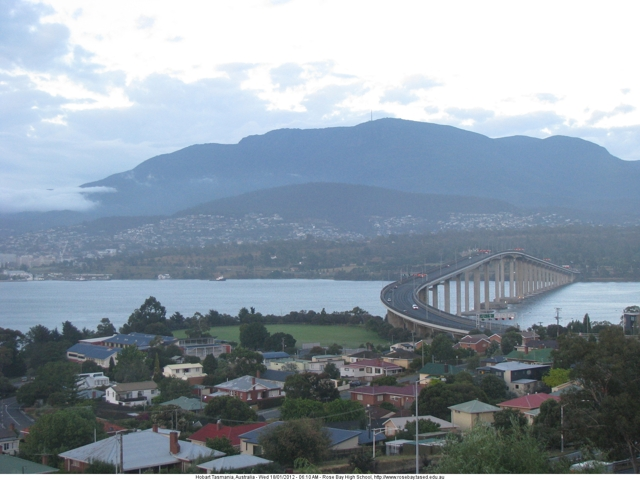

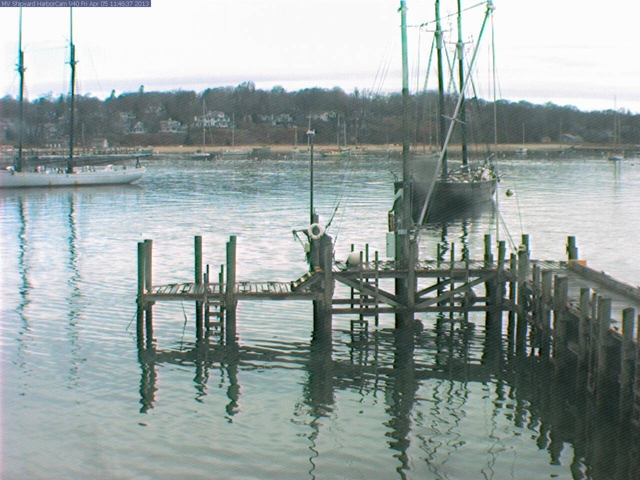

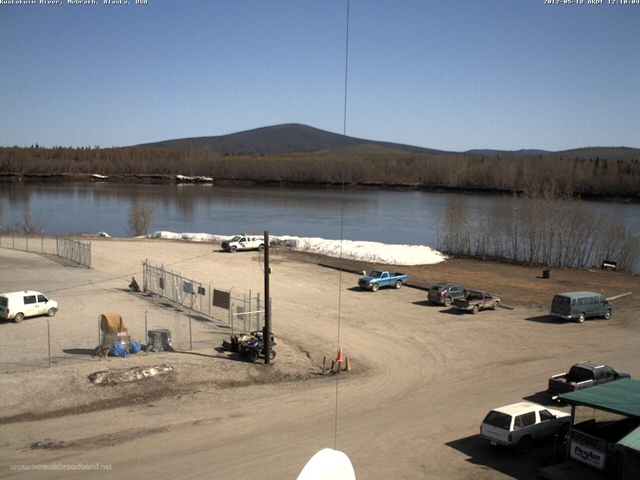

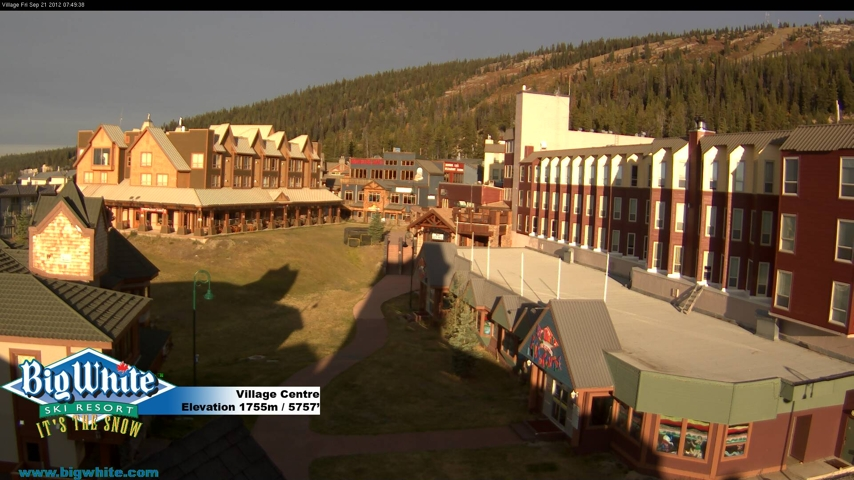

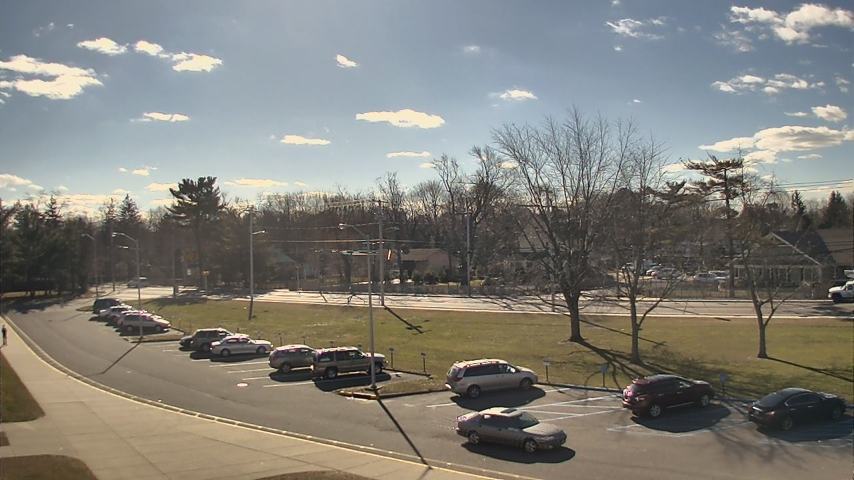

In [28]:
display_markdown('# Verificação visual de algumas amostras do conjunto de treino imageLD',raw=True)
visualizarAmostras(numero_exemplos=5, df_path= imageLD, df_training= df_training_imageLD)

# Verificação visual de algumas amostras do conjunto de treino imageAlignedLD

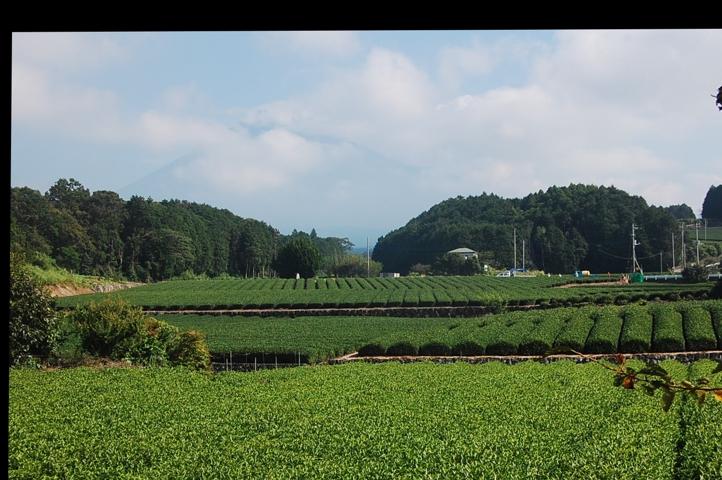

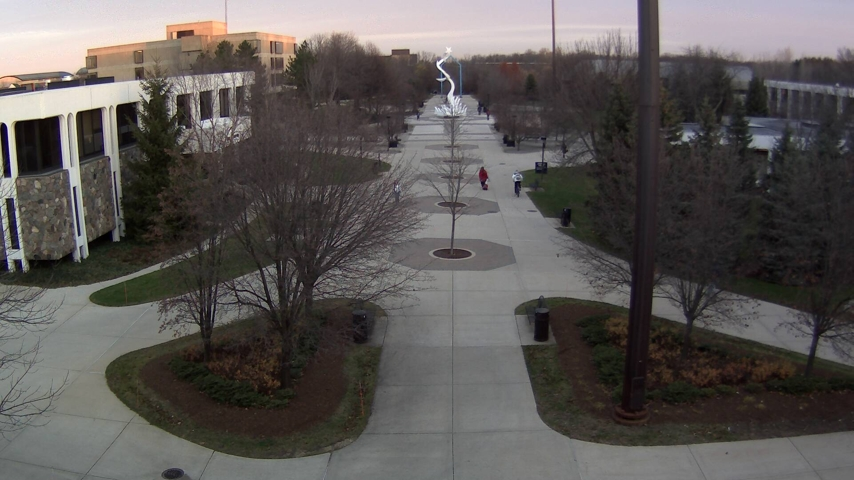

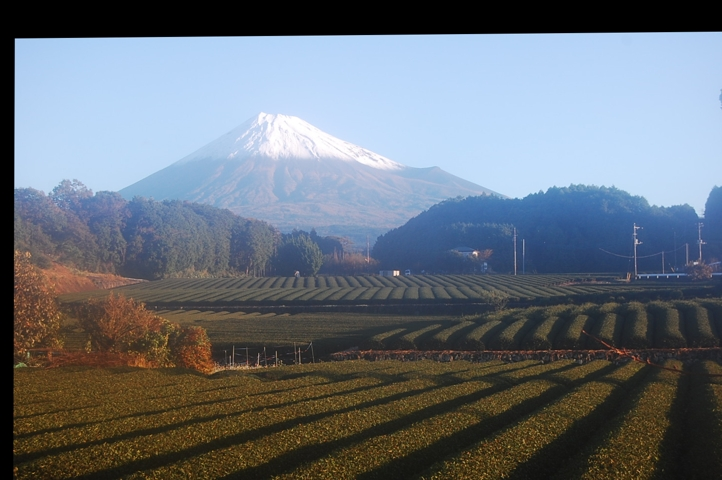

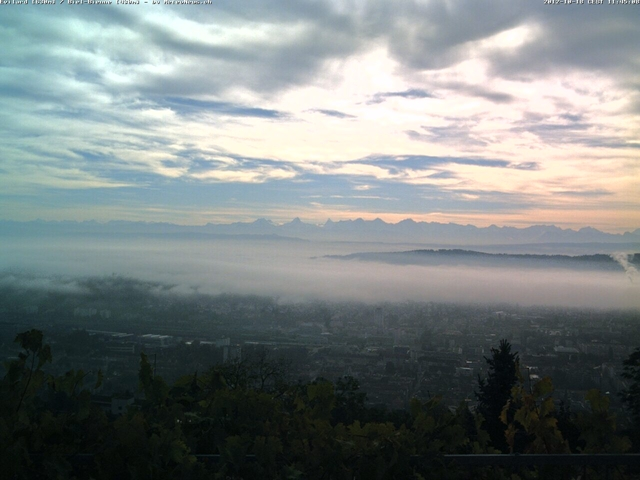

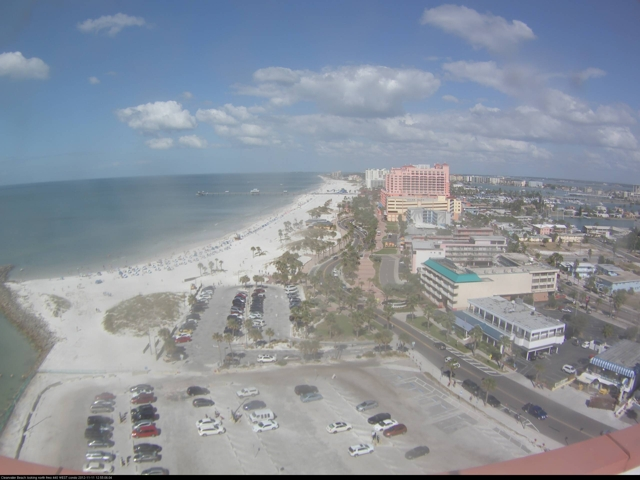

In [29]:
display_markdown('# Verificação visual de algumas amostras do conjunto de treino imageAlignedLD',raw=True)
visualizarAmostras(numero_exemplos=5, df_path= imageAlignedLD, df_training= df_training_imageAlignedLD)

In [30]:
def returnImageByIndex(i, df_path, df_training):
  img = cv2.imread(df_path[df_path.index==df_training.index[i]].values[0][0])
  return img

In [32]:
Path_imageLD = imageLD[imageLD.index.isin(df_training_imageLD.index)]
Path_imageLD = pd.concat([Path_imageLD, df_training_imageLD], axis=1)
Path_imageAlignedLD = imageAlignedLD[imageAlignedLD.index.isin(df_training_imageAlignedLD.index)]
Path_imageAlignedLD = pd.concat([Path_imageAlignedLD, df_training_imageAlignedLD], axis=1)
data_treino = pd.concat([Path_imageLD, Path_imageAlignedLD], axis=0)
data_treino

Path  \
00017609/20130327_003444.jpg  /content/Predição de Atributos Visuais/imageLD...   
00017609/20120707_230439.jpg  /content/Predição de Atributos Visuais/imageLD...   
00017609/20130402_180443.jpg  /content/Predição de Atributos Visuais/imageLD...   
00017609/20121021_200445.jpg  /content/Predição de Atributos Visuais/imageLD...   
00017609/20120423_203438.jpg  /content/Predição de Atributos Visuais/imageLD...   
...                                                                         ...   
00009053/20120103_155109.jpg  /content/Predição de Atributos Visuais/imageAl...   
00009053/20120131_085112.jpg  /content/Predição de Atributos Visuais/imageAl...   
00009053/20120114_082110.jpg  /content/Predição de Atributos Visuais/imageAl...   
00009053/20120115_135111.jpg  /content/Predição de Atributos Visuais/imageAl...   
00009053/20120131_152111.jpg  /content/Predição de Atributos Visuais/imageAl...   

                              (dirty,)  (daylight,)  (night,)  \
00017609/20130327_003444.jpg  0.781630      1.00000  0.038112   
00017609/20120707_230439.jpg  0.312370      1.00000  0.038112   
00017609/20130402_180443.jpg  0.894810      1.00000  0.118930   
00017609/20121021_200445.jpg  0.038731      1.00000  0.118930   
00017609/20120423_203438.jpg  0.240410      1.00000  0.038112   
...                                ...          ...       ...   
00009053/20120103_155109.jpg  0.037827      0.95299  0.112040   
00009053/20120131_085112.jpg  0.427550      0.95299  0.028570   
00009053/20120114_082110.jpg  0.427550      0.95299  0.028570   
00009053/20120115_135111.jpg  0.037827      0.95299  0.112040   
00009053/20120131_152111.jpg  0.427550      0.88612  0.028570   

                              (sunrisesunset,)  (dawndusk,)  (sunny,)  \
00017609/20130327_003444.jpg           0.32737     0.048578   0.78955   
00017609/20120707_230439.jpg           0.20361     0.048578   1.00000   
00017609/20130402_180443.jpg           0.32737     0.048578   0.98938   
00017609/20121021_200445.jpg           0.32737     0.048578   0.93740   
00017609/20120423_203438.jpg           0.20361     0.048578   1.00000   
...                                        ...          ...       ...   
00009053/20120103_155109.jpg           0.65691     0.523680   0.27457   
00009053/20120131_085112.jpg           0.16709     0.082419   0.49144   
00009053/20120114_082110.jpg           0.11749     0.038337   0.55522   
00009053/20120115_135111.jpg           0.65691     0.082419   0.27457   
00009053/20120131_152111.jpg           0.22776     0.354610   0.32553   

                              (clouds,)    (fog,)  (storm,)  ...    (ice,)  \
00017609/20130327_003444.jpg   0.292510  0.019367  0.323410  ...  1.000000   
00017609/20120707_230439.jpg   0.032150  0.019367  0.016800  ...  0.357390   
00017609/20130402_180443.jpg   0.292510  0.019367  0.323410  ...  1.000000   
00017609/20121021_200445.jpg   0.032150  0.019367  0.016800  ...  0.036417   
00017609/20120423_203438.jpg   0.032150  0.019367  0.090003  ...  0.357390   
...                                 ...       ...       ...  ...       ...   
00009053/20120103_155109.jpg   0.447310  0.012657  0.025255  ...  0.000000   
00009053/20120131_085112.jpg   0.033742  0.012657  0.583630  ...  0.993800   
00009053/20120114_082110.jpg   0.033742  0.124930  0.238600  ...  0.441600   
00009053/20120115_135111.jpg   0.033742  0.012657  0.025255  ...  0.000000   
00009053/20120131_152111.jpg   0.033742  0.124930  0.468620  ...  0.902610   

                              (cluttered,)  (soothing,)  (stressful,)  \
00017609/20130327_003444.jpg       0.66597      0.26532      0.256420   
00017609/20120707_230439.jpg       0.67571      0.22040      0.235230   
00017609/20130402_180443.jpg       0.66597      0.12618      0.188490   
00017609/20121021_200445.jpg       0.50170      0.36517      0.000000   
00017609/20120423_203438.jpg       0.50170      0.22040      0.134210   
...                                    ...   

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
img_height = 224
img_width = 224
pre_trained_model  = VGG16(include_top=False, input_shape=(img_height,img_width,3), weights='imagenet')
transfer_layer = pre_trained_model.get_layer('block5_pool')
conv_model = Model(inputs=pre_trained_model.input, outputs=transfer_layer.output)

58900480/58889256 [==============================] - 0s 0us/step


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
# Start a new Keras Sequential model.
model = Sequential()

# Add the convolutional part of the VGG16 model from above.
model.add(conv_model)
model.add(BatchNormalization())
# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
model.add(Flatten())

# Add a dense (aka. fully-connected) layer.
# This is for combining features that the VGG16 model has
# recognized in the image.
model.add(Dense(1024, activation='relu'))

# Add a dropout-layer which may prevent overfitting and
# improve generalization ability to unseen data e.g. the test-set.
model.add(Dropout(0.1))

# Add the final layer for the actual classification.
labels = 40
model.add(Dense(labels, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 40)                41000     
                                                      

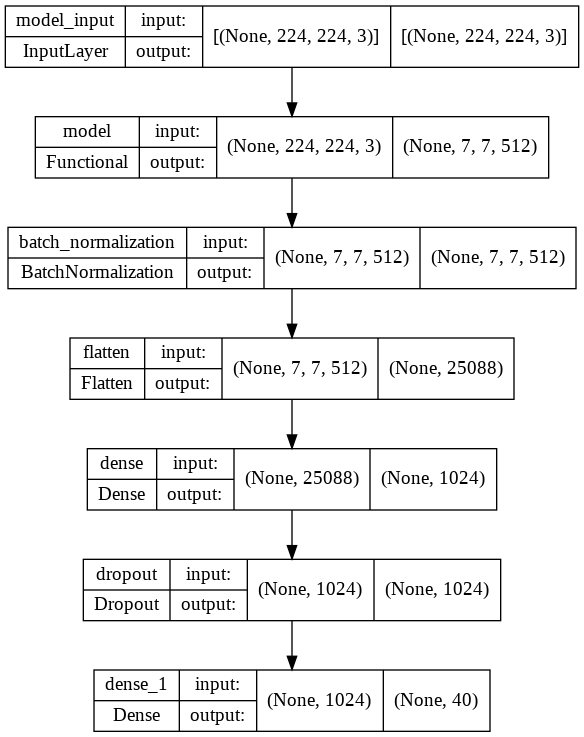

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True)

In [38]:
input_shape = pre_trained_model.layers[0].output_shape[0][1:3]
input_shape

(224, 224)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 20
datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
train_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_drive,
                                             x_col='Path',
                                             y_col=data_treino.columns[1:],
                                             target_size=(img_height,img_width),
                                             batch_size=BATCH_SIZE,
                                             class_mode="raw",
                                             subset='training',
                                             shuffle=True,
                                             seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_drive,
                                             x_col='Path',
                                             y_col=data_treino.columns[1:],
                                             target_size=(img_height,img_width),
                                             batch_size=1,
                                             class_mode="raw",
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

Found 6368 validated image filenames.
Found 1592 validated image filenames.


In [40]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
  SS_res =  K.sum(K.square( y_true-y_pred ))
  SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
  return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [41]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
model.compile(optimizer = optimizer, loss='mean_absolute_error', metrics=[coeff_determination])

In [42]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [43]:
from keras import utils, callbacks
from tensorflow.keras.callbacks import LearningRateScheduler
earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience= 15, restore_best_weights=True)
epochs = 250

In [44]:
total_train = 6368
total_val = 1592
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=total_train//BATCH_SIZE, validation_data=validation_generator, validation_steps=total_val, verbose=1, callbacks=[LearningRateScheduler(lr_schedule),earlystopping])

Epoch 1/250
318/318 [==============================] - 100s 273ms/step - loss: 0.1559 - coeff_determination: 0.4188 - val_loss: 0.1682 - val_coeff_determination: 0.1766 - lr: 0.0010
Epoch 2/250
318/318 [==============================] - 77s 243ms/step - loss: 0.1121 - coeff_determination: 0.6935 - val_loss: 0.1236 - val_coeff_determination: 0.5537 - lr: 0.0010
Epoch 3/250
318/318 [==============================] - 73s 229ms/step - loss: 0.0974 - coeff_determination: 0.7671 - val_loss: 0.1226 - val_coeff_determination: 0.5577 - lr: 0.0010
Epoch 4/250
318/318 [==============================] - 73s 229ms/step - loss: 0.0886 - coeff_determination: 0.8062 - val_loss: 0.1115 - val_coeff_determination: 0.6275 - lr: 0.0010
Epoch 5/250
318/318 [==============================] - 73s 230ms/step - loss: 0.0827 - coeff_determination: 0.8304 - val_loss: 0.1132 - val_coeff_determination: 0.6214 - lr: 0.0010
Epoch 6/250
318/318 [==============================] - 73s 229ms/step - loss: 0.0780 - coeff_d

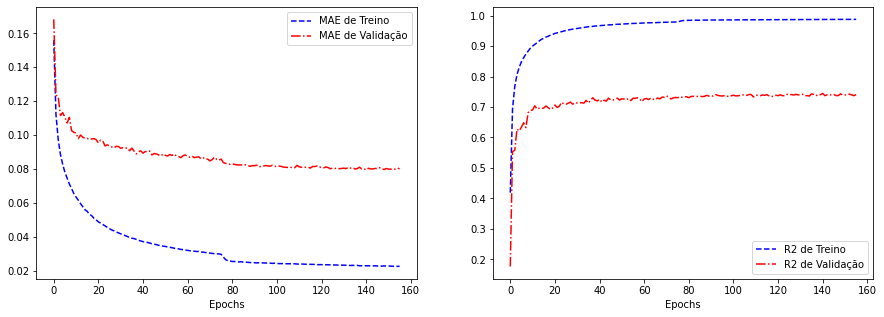

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b--', label = 'MAE de Treino')
plt.plot(history.history['val_loss'], 'r-.', label = 'MAE de Validação')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['coeff_determination'], 'b--', label = 'R2 de Treino')
plt.plot(history.history['val_coeff_determination'], 'r-.', label = 'R2 de Validação')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [46]:
model.save_weights('weights.h5')

In [48]:
test_imageLD = imageLD[imageLD.index.isin(df_test_imageLD.index)]
test_imageLD = pd.concat([test_imageLD, df_test_imageLD], axis=1)

In [50]:
test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_imageLD, directory=path_drive, x_col='Path',
                                                  y_col=test_imageLD.columns[1:],
                                                  target_size=(img_height,img_width),
                                                  batch_size=1,
                                                  class_mode="raw",
                                                  shuffle=False)

Found 1043 validated image filenames.


In [57]:
predictions  = model.predict(test_generator)

In [62]:
predictions.shape

(1043, 40)

In [63]:
y = df_test_imageLD.values

In [66]:
from numpy import linalg as LA
MSE = LA.norm((y-predictions), 2) ** 2/y.size

In [67]:
MSE #Resultado teste usando o banco imageLD e Holdout

0.03191779781323345

In [79]:
from sklearn.metrics import average_precision_score
average_precision_score(np.where(0.8 > y, 1, 0), predictions) #Resultado teste usando o banco imageLD e Holdout

0.9171692020240597

In [72]:
test_imageAlignedLD = imageAlignedLD[imageAlignedLD.index.isin(df_test_imageAlignedLD.index)]
test_imageAlignedLD = pd.concat([test_imageAlignedLD, df_test_imageAlignedLD], axis=1)

In [73]:
test_generator2 = test_datagen.flow_from_dataframe(dataframe=test_imageAlignedLD, directory=path_drive, x_col='Path',
                                                  y_col=test_imageAlignedLD.columns[1:],
                                                  target_size=(img_height,img_width),
                                                  batch_size=1,
                                                  class_mode="raw",
                                                  shuffle=False)

Found 891 validated image filenames.


In [74]:
predictions2  = model.predict(test_generator2)

In [75]:
y2 = df_test_imageAlignedLD.values

In [76]:
MSE2 = LA.norm((y-predictions), 2) ** 2/y.size
MSE2 #Resultado teste usando o banco imageAlignedLD e Holdout

0.03191779781323345

In [80]:
average_precision_score(np.where(0.8 > y2, 1, 0), predictions2) #Resultado teste usando o banco imageAlignedLD e Holdout

0.9127950817290454